# 1. Introduction to Multinomial Logistic Regression

Logistic regression has been used in the field of biological research since the early twentieth century. Then it began to be used in many social sciences. Logistic regression is applicable when the dependent variable (target value) is categorical.

For example, we need to predict:

- whether the email is spam (1) or not (0);
- whether the tumor is malignant (1) or benign (0).

$\boldsymbol{Multinomial}$ $\boldsymbol{logistic}$ $\boldsymbol{regression}$ is a statistical method used for classification problems where the outcome can take on more than two categories. It's an extension of binary logistic regression. The goal is to model the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables.

Let's look at the following examples:

Example Scripts

- Classification of Texts: Determining the topic of the text (for example, sports, politics, technology, art).

- Medical Diagnosis: Classification of the type of disease (eg, infectious, inflammatory, genetic, metabolic).

In each of these scenarios, the outcome is multiple categories, and multinomial logistic regression can be used to predict the probability of each category.

### Some Picture


##### Data Structure  
Let's imagine a data set $\mathcal D$, where each element consists of a pair of feature vectors $\boldsymbol x_i$ and a class label $y_i$:

Let $\mathcal{D}$ be a dataset defined as:

$$
\mathcal{D} = \{(\boldsymbol{x}_i, y_i)\}_{i=1}^n \quad \text{where } \boldsymbol{x}_i \in \mathbb{R}^d \text{ and } y_i \in \mathcal{Y}.
$$

Здесь $\mathcal Y$ — это множество возможных категорий.

##### Probability Prediction
Multinomial logistic regression predicts the probability of membership in each category:

The predicted probability vector $\boldsymbol{\hat{y}}$ is defined as:

$$
\boldsymbol{\hat{y}} = (p_1, \ldots, p_K), \quad \text{where } p_k > 0 \text{ and } \sum_{k=1}^K p_k = 1.
$$


##### Calculating Logits and Softmax Transformation
Logits are calculated as a linear combination of the input features and then converted to probabilities using the softmax function:

The logits $\boldsymbol{z}$ are calculated as a linear combination of the input features $\boldsymbol{x}$ and the weights $\boldsymbol{w}_k$ for each class, and the predicted probability vector $\boldsymbol{\hat{y}}$ is obtained through the softmax function:

$$
z_k = \boldsymbol{x}^\top \boldsymbol{w}_k, \quad \boldsymbol{\hat{y}} = \text{Softmax}(\boldsymbol{z}) = \left( \frac{e^{z_1}}{\sum_{k=1}^K e^{z_k}}, \ldots , \frac{e^{z_K}}{\sum_{k=1}^K e^{z_k}} \right)
$$


##### Class Selection
The predicted class is given by the argument that maximizes the probabilities:

$$
\text{Predicted class} = \arg\max_{1 \leq k \leq K} p_k
$$

##### Model parameters
The weight matrix $\boldsymbol{W}$ is defined as:

$$
\boldsymbol{W} = [\boldsymbol{w}_1 \ldots \boldsymbol{w}_K]
$$

### Quiz: Basic Concepts of Multinomial Logistic Regression


In [18]:
from jupyterquiz import display_quiz
display_quiz("../quizzes/intro.json")

<IPython.core.display.Javascript object>

### Example: MNIST

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'

X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

X = X.astype(float).values / 255
Y = Y.astype(int).values

##### Splitting into train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [21]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 967, 1130,  997, 1013, 1017,  884,  973, 1037,  973, 1009]))

##### Fitting and evaluation

In [22]:
%%time
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.92
CPU times: user 6min 54s, sys: 19.8 s, total: 7min 13s
Wall time: 1min 51s


##### Confusion matrix


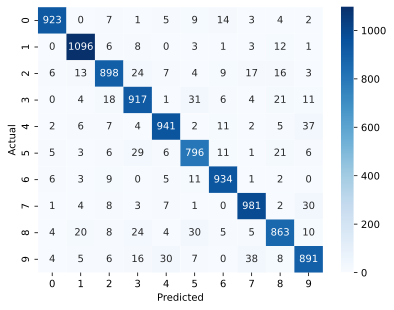

In [23]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred, model.classes_)

##### Prediction Probability Distribution for a Selected Class

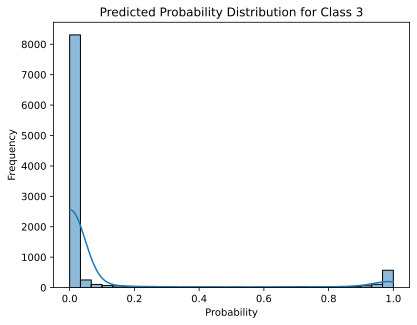

In [24]:
def plot_prediction_probabilities(model, X_test, class_idx):
    probabilities = model.predict_proba(X_test)[:, class_idx]
    sns.histplot(probabilities, kde=True, bins=30)
    plt.title(f'Predicted Probability Distribution for Class {class_idx}')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.show()

plot_prediction_probabilities(model, X_test, class_idx=3)

##### Sample Digit Visualization

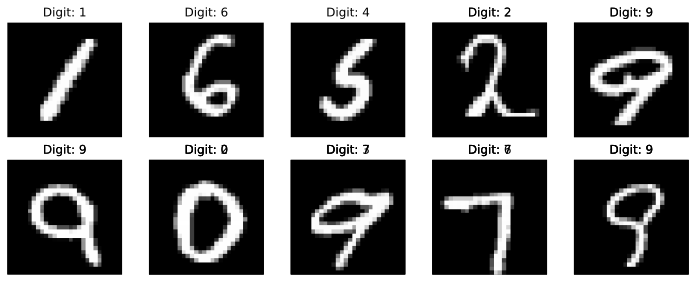

In [25]:
def plot_digits(samples, labels, n_rows=2, n_cols=5):
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_digits(X_test[:10], y_pred[:10])

#####  Feature Distribution Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pixel_intensity_distribution(X):
    """
    Plot the distribution of pixel intensities across the MNIST dataset.
    """
    # Flatten the images to get the distribution of pixel values
    pixel_values = X.flatten()

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(pixel_values, bins=50, kde=True)
    plt.title('Distribution of Pixel Intensities in MNIST Dataset')
    plt.xlabel('Pixel Intensity (normalized)')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the MNIST data
plot_pixel_intensity_distribution(X)

NameError: name 'X' is not defined

##### Pair Plot with PCA Reduced MNIST Dataset

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

def create_pair_plot(X, Y, n_components=5):
    # Applying PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Creating a DataFrame for the pair plot
    pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    pca_df['label'] = Y

    # Creating the pair plot
    sns.pairplot(pca_df, hue='label', palette='Spectral')
    plt.show()

# Call the function with the MNIST data
create_pair_plot(X, Y, n_components=5)


NameError: name 'X' is not defined

##### Code for Multiclass ROC Curve for MNIST Dataset

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from itertools import cycle

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Binarize the output
Y_train_bin = label_binarize(Y_train, classes=range(10))
Y_test_bin = label_binarize(Y_test, classes=range(10))

# Train the model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train_bin)

# Predict probabilities
Y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'brown'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC for MNIST Dataset')
plt.legend(loc="lower right")
plt.show()

# 2.  Mathematical Foundations


# 3. Data Preparation for Multinomial Logistic Regression


# 4. Model Building


# 5. Model Evaluation


# 6. Case Study: Real-world Application

# 7. Advanced Topics

# 8. Common Pitfalls and Best Practices


# 9. Interactive Exercises


# 10. Conclusion and Further Resources
